In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,root_mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,mean_squared_error,r2_score

In [2]:
df=sns.load_dataset('tips')
df.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df['day'].unique()


['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [4]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [5]:
def tip_level(row):
    ratio = row['tip'] / row['total_bill']
    if ratio > 0.25:
        return 'Very High'
    elif ratio > 0.15:
        return 'Medium'
    else:
        return 'Low'

df['tip_level'] = df.apply(tip_level, axis=1)
df


,total_bill,tip,sex,smoker,day,time,size,tip_level
0,16.99,1.01,Female,No,Sun,Dinner,2,Low
1,10.34,1.66,Male,No,Sun,Dinner,3,Medium
2,21.01,3.50,Male,No,Sun,Dinner,3,Medium
3,23.68,3.31,Male,No,Sun,Dinner,2,Low
4,24.59,3.61,Female,No,Sun,Dinner,4,Low
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,Medium
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Low
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Low
242,17.82,1.75,Male,No,Sat,Dinner,2,Low


In [6]:
df['sex']=df['sex'].map({'Female':0,'Male':1})
df['smoker']=df['smoker'].map({'No':0,'Yes':1})
df['day']=df['day'].map({'Sun':1,'Sat':2,'Thur':3,'Fri':4})
df['time']=df['time'].map({'Lunch':0,'Dinner':1})
df['tip_level']=df['tip_level'].map({'Low':0,'Medium':1,'Very High':1})



In [7]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_level
0,16.99,1.01,0,0,1,1,2,0
1,10.34,1.66,1,0,1,1,3,1
2,21.01,3.50,1,0,1,1,3,1
3,23.68,3.31,1,0,1,1,2,0
4,24.59,3.61,0,0,1,1,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2,1,3,1
240,27.18,2.00,0,1,2,1,2,0
241,22.67,2.00,1,1,2,1,2,0
242,17.82,1.75,1,0,2,1,2,0


In [8]:
df['tip_level'].unique()
df['tip_level'].value_counts()


tip_level
1    135
0    109
Name: count, dtype: int64

In [9]:
df['sex'].unique()

[0, 1]
Categories (2, int64): [1, 0]

In [10]:
df.isnull().sum()
df

,total_bill,tip,sex,smoker,day,time,size,tip_level
0,16.99,1.01,0,0,1,1,2,0
1,10.34,1.66,1,0,1,1,3,1
2,21.01,3.50,1,0,1,1,3,1
3,23.68,3.31,1,0,1,1,2,0
4,24.59,3.61,0,0,1,1,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2,1,3,1
240,27.18,2.00,0,1,2,1,2,0
241,22.67,2.00,1,1,2,1,2,0
242,17.82,1.75,1,0,2,1,2,0


<Axes: ylabel='total_bill'>

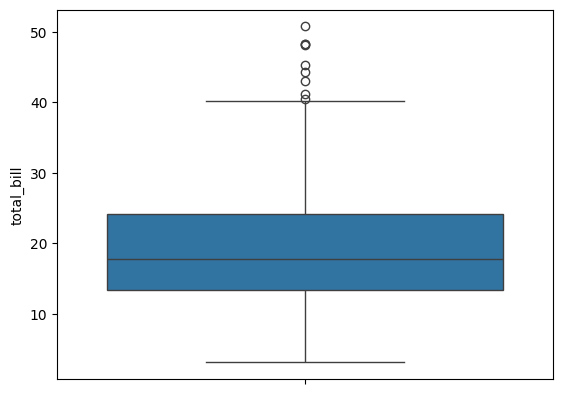

In [11]:
import seaborn as sns
sns.boxplot(df['total_bill'])


In [12]:
X=df[['tip','sex','smoker','day','time','size','total_bill']]
y=df['tip_level']

In [13]:
df['tip_level'].value_counts()


tip_level
1    135
0    109
Name: count, dtype: int64

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
model=LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:

# Step 7: Predict on test data
y_pred = model.predict(X_test)
# Step 8: Evaluate model
print("✅ Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

#Step 9 (Optional): Predict probability
print("\n🔹 Predicted Probabilities:\n", model.predict_proba(X_test))

✅ Accuracy: 97.2972972972973

🔹 Confusion Matrix:
 [[33  0]
 [ 2 39]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.95      0.97        41

    accuracy                           0.97        74
   macro avg       0.97      0.98      0.97        74
weighted avg       0.97      0.97      0.97        74


🔹 Predicted Probabilities:
 [[3.19141381e-01 6.80858619e-01]
 [2.96325268e-02 9.70367473e-01]
 [9.99732609e-01 2.67390724e-04]
 [2.74593722e-03 9.97254063e-01]
 [3.56099387e-01 6.43900613e-01]
 [9.24909066e-01 7.50909342e-02]
 [9.99645499e-01 3.54500533e-04]
 [6.20869318e-02 9.37913068e-01]
 [8.40233477e-03 9.91597665e-01]
 [3.04834436e-02 9.69516556e-01]
 [2.40194537e-01 7.59805463e-01]
 [6.26675238e-01 3.73324762e-01]
 [6.56596241e-01 3.43403759e-01]
 [5.06015909e-01 4.93984091e-01]
 [1.98102444e-01 8.01897556e-01]
 [9.99271338e-01 7.28662016e-04]
 [3.39993946e-03 9.

In [17]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5


print("=== Multiple Linear Regression Results ===")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


# Show predictions
results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print("\nPredicted vs Actual:")
print(results)


=== Multiple Linear Regression Results ===
Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16
R² Score: 0.89

Predicted vs Actual:
     Actual Price  Predicted Price
24              1                1
6               1                1
153             0                0
211             1                1
198             1                1
..            ...              ...
165             0                0
154             0                0
216             0                0
79              1                1
29              1                0

[74 rows x 2 columns]


In [18]:
import pickle
import os

# Assuming you already trained your model using:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# model = LogisticRegression()
# model.fit(X_train, y_train)

# Create folder to store models
os.makedirs("models", exist_ok=True)

# Save your model twice — one for regression and one for classification
pickle.dump(model, open("models/regression_model.pkl", "wb"))
pickle.dump(model, open("models/classification_model.pkl", "wb"))

print("✅ Models saved successfully!")


✅ Models saved successfully!


In [ ]:
import numpy as np
import pickle
import gradio as gr
import traceback

# ============================================
# 1️⃣ Define Prediction Function
# ============================================
def predict_tip(total_bill, sex, smoker, day, time, size):
    try:
        # Load trained models
        reg_model = pickle.load(open("models/regression_model.pkl", "rb"))
        clf_model = pickle.load(open("models/classification_model.pkl", "rb"))

        # Encode categorical features
        sex = 1 if sex == "Male" else 0
        smoker = 1 if smoker == "Yes" else 0
        day_map = {"Sun": 1, "Sat": 2, "Thur": 3, "Fri": 4}
        day = day_map[day]
        time = 1 if time == "Dinner" else 0

        # Create input array
        input_data = np.array([[total_bill, sex, smoker, day, time, size]])

        # Predictions
        tip_pred = reg_model.predict(input_data)[0]
        high_tip_prob = clf_model.predict_proba(input_data)[0][1]
        tip_category = "💎 High Tipper" if high_tip_prob >= 0.5 else "🙂 Low/Medium Tipper"

        # Return results
        return f"💰 Predicted Tip: ₹{tip_pred:.2f}\n🤖 Prediction: {tip_category}\n📊 Confidence: {high_tip_prob:.2%}"

    except Exception:
        return f"❌ Error Occurred:\n{traceback.format_exc()}"


# ============================================
# 2️⃣ Build Gradio Interface
# ============================================
with gr.Blocks(title="Restaurant Tip Prediction AI") as demo:
    gr.Markdown("## 🍽️ Predict Restaurant Tips and Customer Tipping Behavior using AI")

    with gr.Row():
        total_bill = gr.Number(label="💵 Total Bill Amount")
        size = gr.Slider(1, 10, value=2, label="👥 Party Size")

    with gr.Row():
        sex = gr.Radio(["Male", "Female"], label="🧍 Gender")
        smoker = gr.Radio(["Yes", "No"], label="🚬 Smoker")
    
    with gr.Row():
        day = gr.Radio(["Sun", "Sat", "Thur", "Fri"], label="📅 Day")
        time = gr.Radio(["Lunch", "Dinner"], label="⏰ Time")

    output = gr.Textbox(label="Prediction Result")

    submit_btn = gr.Button("🚀 Submit")
    submit_btn.click(
        fn=predict_tip,
        inputs=[total_bill, sex, smoker, day, time, size],
        outputs=output
    )

# ============================================
# 3️⃣ Launch App
# ============================================
demo.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


d:\DATA_SCIENCE\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\DATA_SCIENCE\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# 📊 Regression Model Evaluation Summary

## 🎯 1. Key Metrics Overview

| Metric | Meaning | Goal |
|---------|----------|------|
| **MAE (Mean Absolute Error)** | Average absolute difference between actual and predicted values | 🔽 Lower = Better |
| **MSE (Mean Squared Error)** | Average squared difference (penalizes large errors more) | 🔽 Lower = Better |
| **RMSE (Root Mean Squared Error)** | Square root of MSE (same units as target variable) | 🔽 Lower = Better |
| **R² (R-squared)** | Proportion of variance explained by the model | 🔼 Higher = Better (close to 1) |

---

## 💡 2. Ideal Model Characteristics

✅ **MAE → small**  
✅ **MSE → small**  
✅ **RMSE → small**  
✅ **R² → high (close to 1)**  


--

## 📊 4. RMSE vs MAE Ratio

| RMSE/MAE Ratio | Interpretation |
|-----------------|----------------|
| **1.0 – 1.1** | Excellent (errors are uniform) ✅ |
| **1.2 – 1.4** | Acceptable (minor variation) ⚙️ |
| **> 1.5** | Poor (large outliers present) ⚠️ |

---



### Interpretation:
- MAE and RMSE are **close**, meaning error distribution is **consistent** ✅  
- R² = 0.77 → model explains **77% of data variance** ✅  
✅ Therefore, **Model is good (accurate + reliable)**

---

## 🧠 6. Intuitive Understanding (Lemon Style 🍋)

| Metric | Intuitive Meaning |
|---------|-------------------|
| **MAE** | Average mistake in simple form (like “kitna galat bola on avg”) |
| **MSE** | Same as MAE but squares errors — punishes big mistakes more |
| **RMSE** | Same as MSE but in original units — easier to interpret |
| **R²** | How much of the real-world variation model explains (close to 1 → wow 😍) |

---

## ✅ 7. Final Rule of Thumb

> If  
> - **MAE** and **MSE** are small  
> - **RMSE ≈ MAE**  
> - **R²** is high  
>
> 🎯 Then your model is **strong, consistent, and accurate**.

---

## 📈 (Optional Visualization)


